In [1]:
# Plotting the line scans requires (inline only chosen for github presentation):
#%matplotlib qt5
%matplotlib inline
from pl_analysis import EELS_image_fit as eif

/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:58: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  mpl.rcParams['text.latex.unicode'] = True


In [2]:
######## Loading an EEL spectrum image
######## For more information, see docstring.
eif = eif(is_lazy=True)

Does the file include stored models from previous fitting? (y/n): y
[########################################] | 100% Completed |  0.9s
Available models: 

"0" :  VolumePlasmonDrude_leastsq_ls 

"1" :  VolumePlasmonDrude_mpfit_ls 

"2" :  VolumePlasmonDrude_NelderMead_ml 

"3" :  Lorentzian_leastsq_ls 

"4" :  Lorentzian_mpfit_ls 

"5" :  Lorentzian_NelderMead_ml 

"6" :  Gaussian_leastsq_ls 

"7" :  Gaussian_mpfit_ls 

"8" :  Gaussian_NelderMead_ml 

"9" :  Voigt_leastsq_ls 

"10" :  Voigt_mpfit_ls 

"11" :  Voigt_NelderMead_ml 


If you want to exit the model loading process,please type: ("exit"/"cancel")
Which model should be loaded? 3
Loading parameter maps for: Lorentzian_leastsq_ls
Finished loading process.
[########################################] | 100% Completed |  0.1s
Aligning datastructure successful. Estimate poissonian noise...
Do you want to load the corresponding darkfield image?
(Warning: The dimensions should match exactly for correct functionality.) (y/n): n
Please 

In [3]:
######### Loading a new model and correspond parameters
######### into class attribute for analysis by:
eif.load_model(mkey='Lorentzian_leastsq_ls')

[########################################] | 100% Completed |  0.1s
Available models: 

"0" :  VolumePlasmonDrude_leastsq_ls 

"1" :  VolumePlasmonDrude_mpfit_ls 

"2" :  VolumePlasmonDrude_NelderMead_ml 

"3" :  Lorentzian_leastsq_ls 

"4" :  Lorentzian_mpfit_ls 

"5" :  Lorentzian_NelderMead_ml 

"6" :  Gaussian_leastsq_ls 

"7" :  Gaussian_mpfit_ls 

"8" :  Gaussian_NelderMead_ml 

"9" :  Voigt_leastsq_ls 

"10" :  Voigt_mpfit_ls 

"11" :  Voigt_NelderMead_ml 

Loading parameter maps for: Lorentzian_leastsq_ls
Finished loading process.


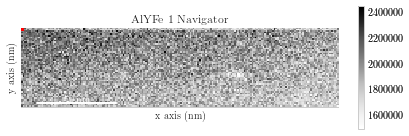

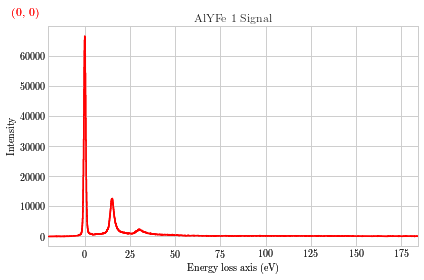

In [3]:
######### Plotting a signal or linescan as follows:
######### Attributes can be found directly in eif.
######### See hyperspy documentation of plot() function
######### for more information on arguments.
eif.File.plot()

#eif.File_deconv.plot()
#eif.Fit_model.plot()

######### Parameter maps are also accessable
#eif.Ep_q0.plot()

######### Further information on each signal is stored 
######### the corresponding metadata attribute, e.g.:
#eif.Ep_q0.metadata

Loading /home/ag-wilde/Desktop/EELS_SI-Fitting (max)/AlYFe_1/18.01.26 Spectrum image_HAADF_STEM.dm3


array([[0.20817201, 0.32917951, 0.48483458, ..., 1.11452975, 0.73542605,
        0.27713463],
       [0.4805191 , 0.90180786, 1.28090547, ..., 2.15079289, 1.50960116,
        0.55567609],
       [0.81845506, 1.66677478, 2.38675238, ..., 3.1314961 , 2.17412782,
        0.86380278],
       ...,
       [0.08763289, 0.2461661 , 0.39309397, ..., 1.96809881, 1.28910884,
        0.66950545],
       [0.05717667, 0.14333376, 0.22824832, ..., 1.26135146, 0.79396891,
        0.4095673 ],
       [0.03114419, 0.07394719, 0.10805342, ..., 0.56371869, 0.35767605,
        0.19503253]])

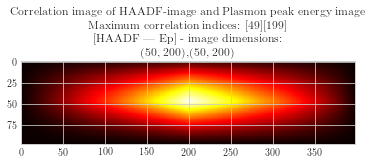

In [4]:
######### Cross correlation between parameter maps and
######### a corresponding HAADF image which has to be 
######### loaded during main loading routine or by
######### calling the dfimage() function
eif.load_dfimage(rotate=True)
eif.cross_correlation(eif.Ep_q0)

In [4]:
######### Example on how to start a fitting routine for
######### model parameter investigation.
######### This will generate all parameter signals as
######### well as storing them in the class attributes.
######### See hyperspy documentation of fit() function
######### for more information on arguments.
eif.eels_fit_routine(function_set='VolumePlasmonDrude', 
                     fitter='Nelder-Mead', 
                     method='ml', 
                     samfire=True, 
                     workers=8
                    )

In [5]:
######### After attributes are stored, line scans 
######### can be used for further investigation:

#### The line to specify the spatial location of
#### the line scan can be read out by:
#eif.line
#will be None if not initiated.

#### A line can be set manually with source and 
#### destination coordinates as follows_
import hyperspy.api as hs
eif.line = hs.roi.Line2DROI(x1=23.4343, 
                            y1=2.45814, 
                            x2=27.2907, 
                            y2=44.7392, 
                            linewidth=41.5702
                           )

#### If no line is specified an interactive widget
#### is supported to be adjusted on the Ep_q0 signal

#### Setting the time to wait for adjustments 
#### (default = 30):
#eif.time=15

#### Manually setting the line to none to enable
#### interactive mode:
#eif.line=None

#### Clearing the previously generated linescans
#### Has to be done previous to any linescans following
#### the first linescan generation:
eif.linescans = {}

#### If thickness signal is calculated it will be 
#### considered for the linescan generation and
#### fitted by a polynom if specified.
#### Elements and composition have to be specified as
#### follows:
eif.calc_thickness(['Al','Y','Fe'], 
                   [0.88,0.07,0.05]
                  )

#### Generating all parameter linescans and
#### if specified fitting the linescans by
#### polynomial approach and in addition
#### if a peak is found trying to fit a 
#### parameter shift by a gauß approach
#### (attribute enabling fitting: parameter_shifts).
eif.generate_linescans(parameter_shifts=True, 
                       show=False, 
                       sensitivity=5, 
                       medfilt_radius=3,
                       polygradn=1
                      )

[########################################] | 100% Completed |  0.1s
Estimated mean free path: 6.13E+01 nm
Variance estimation for: Plasmon energy - $E_{p}(q=0)$
mean variance:  0.00034114772021448417
mean variance of fitted parameters:  4.2893373281997644e-07

Estimation for: Plasmon energy - $E_{p}(q=0)$ - line scan

weight factors:  [0.99544631 0.99543365 0.99542155 0.99541    0.99539902 0.99538861
 0.99537878 0.99536952 0.99536084 0.99535275 0.99534524 0.99533832
 0.995332   0.99532627 0.99532113 0.9953166  0.99531267 0.99530934
 0.99530661 0.99530449 0.99530297 0.99530206 0.99530176 0.99530206
 0.99530297 0.99530449 0.99530661 0.99530934 0.99531267 0.9953166
 0.99532113 0.99532627 0.995332   0.99533832 0.99534524 0.99535275
 0.99536084 0.99536952 0.99537878 0.99538861 0.99539902 0.99541
 0.99542155 0.99543365]

fitted initial polynomial parameter:  [1.51227653e+01 3.00019311e-04]

polynomial weighted least squared fit:  [1.51227656e+01 2.99993341e-04] [[ 5.70106251e-06 -1.99104669e


OHaver estimates:  [array([(29.91257942, 0.02171642, 8.16854393)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([( 2.89476575, 0.00609648, nan), (15.43875067, 0.00432416, nan),
       (18.33351642, 0.00868884, nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
peak accepted: (29.91257942, 0.02171642, 8.16854393)

Used estimate for most dominant gaussian peak in bounds:  [2.99125794e+01 2.17164158e-02 8.16854393e+00]

Position estimation of sheared region with lower standard deviation:
$2.972 \pm 0.084

Fit summarization - resulting parameters:  [3.03623793e+01 2.59557100e-02 2.97154340e+00 1.51238045e+01
 4.14222287e-05]

Fit summarization - resulting covariance matrix:  [[ 6.09499054e-02  2.51326334e-05  5.74576606e-03  3.96314270e-05
  -2.47496418e-06]
 [ 2.51326334e-05  3.82943188e-06 -1.46372391e-04  1.17314482e-07
  -2.61323376e-08]
 [ 5.74576606e-03 -1.46372391e-04  8.35899771e-02  2.67618962e-05
  -5.97410922e-06]
 [ 3.96314270e-05  1.17314482e-07  2.67618962e-05  1.08512395e-06
  -4.11927531e-08]
 [-2.47496418e-06 -2.61323376e-08 -5

/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:4367: RuntimeWarning: divide by zero encountered in double_scalars
  return height * np.exp(- 1/(2 * sigma**2) * (x - x0)**2)
/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:4367: RuntimeWarning: invalid value encountered in multiply
  return height * np.exp(- 1/(2 * sigma**2) * (x - x0)**2)


Variance estimation for: Plasmon peak - $E_{\max}$
mean variance:  0.00039379402763556424
mean variance of fitted parameters:  4.3124620935835853e-07

Estimation for: Plasmon peak - $E_{\max}$ - line scan

weight factors:  [0.99544631 0.99543365 0.99542155 0.99541    0.99539902 0.99538861
 0.99537878 0.99536952 0.99536084 0.99535275 0.99534524 0.99533832
 0.995332   0.99532627 0.99532113 0.9953166  0.99531267 0.99530934
 0.99530661 0.99530449 0.99530297 0.99530206 0.99530176 0.99530206
 0.99530297 0.99530449 0.99530661 0.99530934 0.99531267 0.9953166
 0.99532113 0.99532627 0.995332   0.99533832 0.99534524 0.99535275
 0.99536084 0.99536952 0.99537878 0.99538861 0.99539902 0.99541
 0.99542155 0.99543365]

fitted initial polynomial parameter:  [1.51817045e+01 3.64367078e-04]

polynomial weighted least squared fit:  [1.51817048e+01 3.64337429e-04] [[ 7.32369165e-06 -2.55773443e-07]
 [-2.55773443e-07  1.20487121e-08]]



OHaver estimates:  [array([(29.91257942, 0.02449006, 8.6584773)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(11.579063  , 0.00370752, 2.77067928),
       (18.33351642, 0.01037111,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
peak accepted: (29.91257942, 0.02449006, 8.6584773)

Used estimate for most dominant gaussian peak in bounds:  [2.99125794e+01 2.44900637e-02 8.65847730e+00]

Fit summarization - resulting parameters:  [3.03021275e+01 2.92113207e-02 3.05462821e+00 1.51828647e+01
 6.71794961e-05]

Fit summarization - resulting covariance matrix:  [[ 6.39198532e-02  3.11907156e-05  6.50935977e-03  4.81286308e-05
  -3.04245524e-06]
 [ 3.11907156e-05  4.82829088e-06 -1.60335601e-04  1.52666017e-07
  -3.45527612e-08]
 [ 6.50935977e-03 -1.60335601e-04  8.87639231e-02  3.17800075e-05
  -7.21107793e-06]
 [ 4.81286308e-05  1.52666017e-07  3.17800075e-05  1.39937765e-06
  -5.32898223e-08]
 [-3.04245524e-06 -3.45527612e-08 -7.21107793e-06 -5.32898223e-08
   3.36953338e-09]]
Variance estimation for: Plasmon peak - $\Gamma$
mean va


OHaver estimates:  [array([( 9.64921917, 0.00826496,  3.86640528),
       (28.94765751, 0.0663086 , 15.07244337)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(18.33351642, 0.03902805, nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
peak accepted after ignoring bad sigma: (9.64921917, 0.00826496, 4.82460958)
peak accepted after ignoring bad sigma: (28.94765751, 0.0663086, 4.82460958)

Used estimate for most dominant gaussian peak in bounds:  [28.94765751  0.0663086   4.82460958]

Fit summarization - resulting parameters:  [2.97843636e+01 7.65556939e-02 3.73442372e+00 2.67448732e+00
 5.88914925e-04]

Fit summarization - resulting covariance matrix:  [[ 1.69781908e-01  3.22458545e-04  3.08203621e-02  4.08076987e-04
  -2.88624091e-05]
 [ 3.22458545e-04  6.05284874e-05 -4.69532479e-04  2.42780842e-06
  -6.31125327e-07]
 [ 3.08203621e-02 -4.69532479e-04  2.62410795e-01  2.25805159e-04
  -6.03088307e-05]
 [ 4.08076987e-04  2.42780842e-06  2.25805159e-04  2.03245376e-05
  -7.95075561e-07]
 [-2.88624091e-05 -6.31125327e-07 -6.03088307e-05 -7.95075561e-07
   5.63654677e-08]]
Variance estimat


OHaver estimates:  [array([(11.579063  ,  5919.23848562, 9.13559945),
       (16.40367259, 15722.35088105, 6.96491509),
       (16.40367259, 15722.35088105,        nan),
       (24.12304792,  4845.8744143 ,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([( 0.96492192,  4064.58233922,        nan),
       ( 2.89476575, 10600.45628346, 2.8070115 ),
       (27.98273559,  9007.42624212, 7.46209075),
       (37.63195476,  3931.24217147, 8.48845784)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
peak accepted: (11.579063, 5919.23848562, 9.13559945)

Used estimate for most dominant gaussian peak in bounds:  [  11.579063   5919.23848562    9.13559945]

Fit summarization - resulting parameters:  [ 1.56394129e+01  1.11972637e+04  5.08079792e+00  5.09909896e+05
 -3.43916546e+02]

Fit summarization - resulting covariance matrix:  [[ 1.72424495e+00 -5.28473766e+02 -4.47257017e-01  1.52046618e+03
  -5.09734412e+01]
 [-5.28473766e+02  6.89414729e+06  1.98447494e+01 -3.79334047e+06
   8.29870128e+04]
 [-4.47257017e-01  1.98447494e+01  2.74521980e+00 -3.25228178e+03
   7.01590067e+01]
 [ 1.52046618e+03 -3.79334047e+06 -3.25228178e+03  8.93982082e+06
  -2.37673694e+05]
 [-5.09734412e+01  8.29870128e

/home/ag-wilde/anaconda3/envs/Hyperspy/lib/python3.7/site-packages/hyperspy/_signals/signal1d.py:181: RankWarning: Polyfit may be poorly conditioned
  xxf[yynz], np.log10(np.abs(yy[yynz])), 2)


Variance estimation for: Zero Loss peak - $E_{\max}$
mean variance:  2.834355937801254e-05
mean variance of fitted parameters:  2.2219365240255822e-08
Variance estimation for: Zero Loss peak - $\Gamma$
mean variance:  0.0003794609798552832
mean variance of fitted parameters:  3.684388367158522e-07
Variance estimation for: Zero Loss peak - intensity
mean variance:  5949756917.427074
mean variance of fitted parameters:  282057.07692946354

Estimation for: Zero Loss peak - intensity - line scan

weight factors:  [0.99544631 0.99543365 0.99542155 0.99541    0.99539902 0.99538861
 0.99537878 0.99536952 0.99536084 0.99535275 0.99534524 0.99533832
 0.995332   0.99532627 0.99532113 0.9953166  0.99531267 0.99530934
 0.99530661 0.99530449 0.99530297 0.99530206 0.99530176 0.99530206
 0.99530297 0.99530449 0.99530661 0.99530934 0.99531267 0.9953166
 0.99532113 0.99532627 0.995332   0.99533832 0.99534524 0.99535275
 0.99536084 0.99536952 0.99537878 0.99538861 0.99539902 0.99541
 0.99542155 0.995433


OHaver estimates:  [array([(16.40367259, 31649.12875584, 13.4452601),
       (16.40367259, 31649.12875584,        nan)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([(26.05289176, 12795.02989694,  6.21949931),
       (26.05289176, 12795.02989694, 10.37115733)],
      dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
peak accepted: (16.40367259, 31649.12875584, 13.4452601)

Used estimate for most dominant gaussian peak in bounds:  [1.64036726e+01 3.16491288e+04 1.34452601e+01]
Optimal parameters not found:Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

Fit summarization - resulting parameters:  [      0.               0.               0.         1070198.54899846
   -4225.93012161]

Fit summarization - resulting covariance matrix:  [[inf inf inf nan nan]
 [inf inf inf nan nan]
 [inf inf inf nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
Variance estimation for: second Plasmon peak - $E_{\max}$
mean variance:  0.001575176110542257


/home/ag-wilde/anaconda3/envs/Hyperspy/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:3948: RuntimeWarning: Mean of empty slice
  mean_line_fstd = np.nanmean(line_fstd.data)
/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:3955: RuntimeWarning: Mean of empty slice
  print('mean variance of fitted parameters: ',np.nanmean(line_var_fstd.data))


mean variance of fitted parameters:  nan
Variance estimation for: second Plasmon peak - $\Gamma$
mean variance:  2.0776860042718863
mean variance of fitted parameters:  0.0030790245977577696
Variance estimation for: second Plasmon peak - intensity
mean variance:  633710581.7067952
mean variance of fitted parameters:  3117547.8503874256
Variance estimation for: intensity ratio - $I_{pp}/I_{zlp}$
mean variance:  0.00014478599083900763
intensity ratio - $I_{pp}/I_{zlp}$: 

'DictionaryTreeBrowser' object has no attribute 'Noise_properties'

Falling back using spatial error estimation.

Estimation for: intensity ratio - $I_{pp}/I_{zlp}$ - line scan

weight factors:  [0.99544631 0.99543365 0.99542155 0.99541    0.99539902 0.99538861
 0.99537878 0.99536952 0.99536084 0.99535275 0.99534524 0.99533832
 0.995332   0.99532627 0.99532113 0.9953166  0.99531267 0.99530934
 0.99530661 0.99530449 0.99530297 0.99530206 0.99530176 0.99530206
 0.99530297 0.99530449 0.99530661 0.99530934 0.99531267 0.9953


OHaver estimates:  [array([], dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]



OHaver estimates:  [array([], dtype=[('position', '<f8'), ('height', '<f8'), ('width', '<f8')])]
The parameter shifts found do not match expected ranges for gaussian estimation.
Maybe sensitivity (scaling of lower bound of sigma), medfilt_radius (smoothing) or 
polygradn (higher DOF for thickness dependence) can lead improved peak estimation 
using Ohaver.


Fit summarization - resulting parameters:  [0.         0.         0.         0.48040343 0.00175645]

Fit summarization - resulting covariance matrix:  [[inf inf inf nan nan]
 [inf inf inf nan nan]
 [inf inf inf nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


/home/ag-wilde/Desktop/EELS_SI-Fitting (max)/pl_analysis.py:3349: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.linescan_plots[key].show()


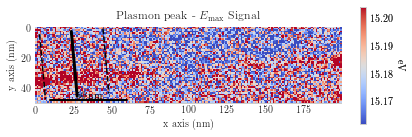

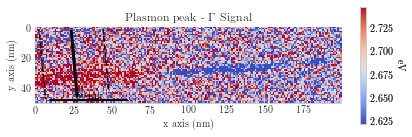

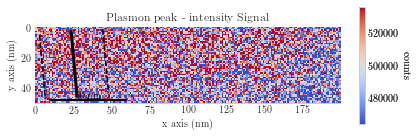

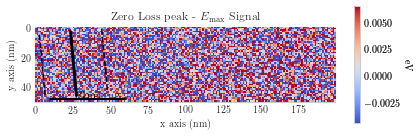

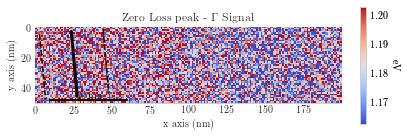

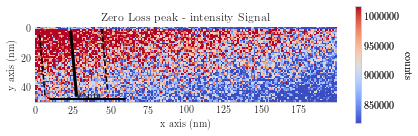

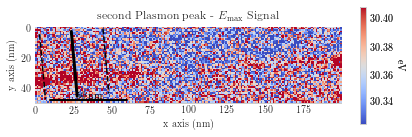

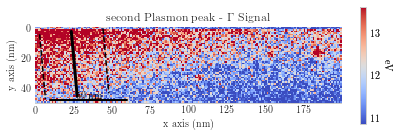

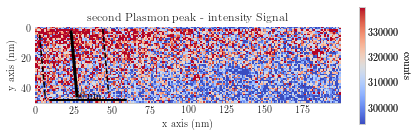

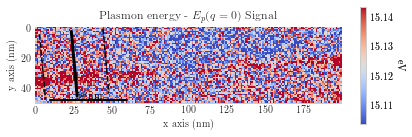

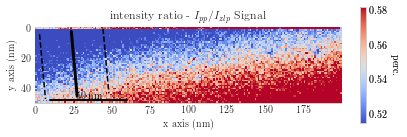

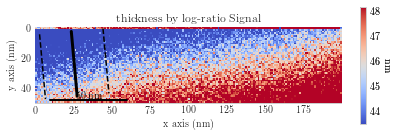

In [6]:
#### After analysis plotting all possible
#### results as follows:
eif.plot_parameter_maps(overview=False,
                        first_plasmon_only=True
                       )

In [7]:
#### Saving all results generated by:
eif.save_evaluation()

Writing parameter maps to disk...
Writing line scans to disk...
Writing goodness to disk...
Trying to access thickness signal...
Writing thickness estimation to disk...
Finished!
